# Cement Strength Prediction
## Introduction to features included in dataset: 
1. `Cement (kg in a m^3 mixture)`
2. `Blast Furnace Slag (kg in a m^3 mixture)`
3. `Fly Ash (kg in a m^3 mixture)`
4. `Water (kg in a m^3 mixture)`
5. `Superplasticizer (kg in a m^3 mixture)`
6. `Coarse Aggregate (kg in a m^3 mixture)`
7. `Fine Aggregate (kg in a m^3 mixture)`
8. `Age (day)`

Target feature: `Concrete compressive strength(MPa, megapascals)`

In [1]:
# Import libraries
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 12.4 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 53.1 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 58.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 9.2 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 56.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 58.2 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to

In [25]:
# Import dataste as dataframe
df = pd.read_csv('/config/workspace/Cement_Strength_Prediction/notebooks/data/cement_data.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# Columns in dataset
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
# Shape of dataset
df.shape

(1030, 9)

Dataset contains 1030 rows and 9 columns(including target column)

In [7]:
# Description of dataset
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

## All features in dataset are numerical.

In [10]:
# Null values in dataset
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## Dataste contain zero null/NaN values.

In [26]:
# Duplicate values in dataset
df.duplicated().sum()

25

## Dataset contain 25 duplicate entries.

In [27]:
# Let's drop duplicate entries
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Visualization of features

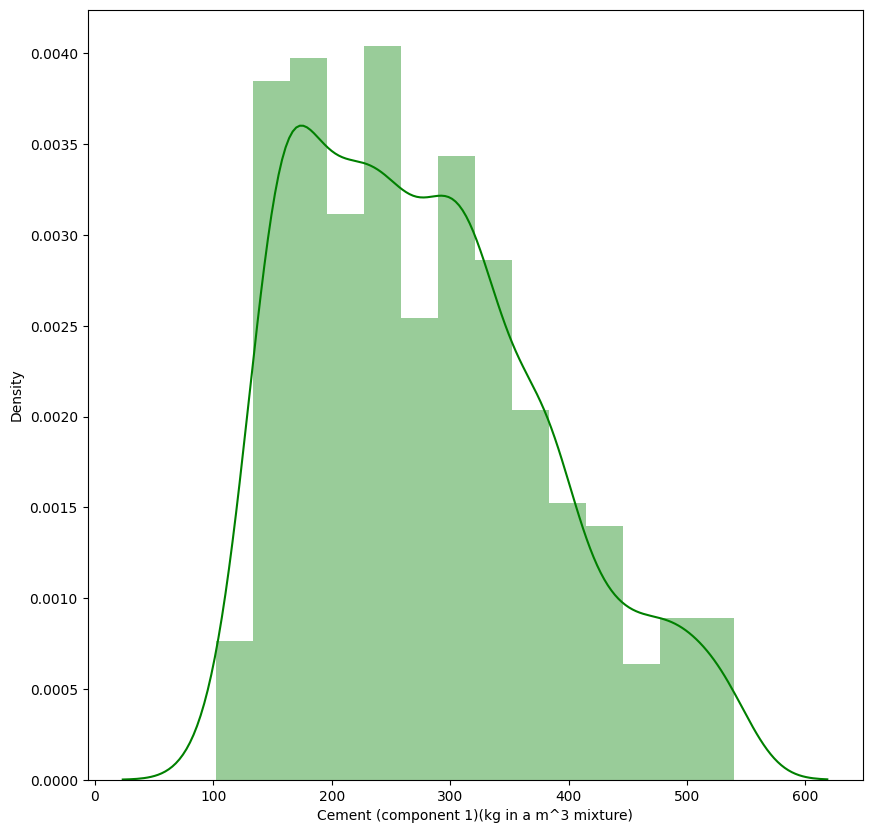

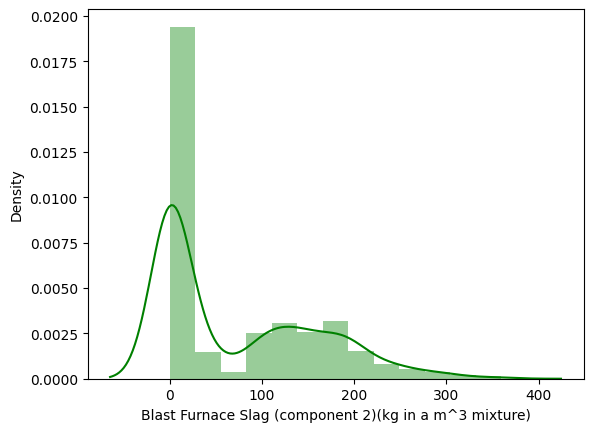

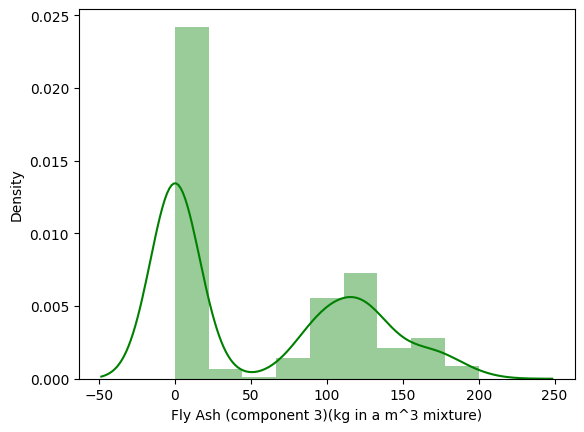

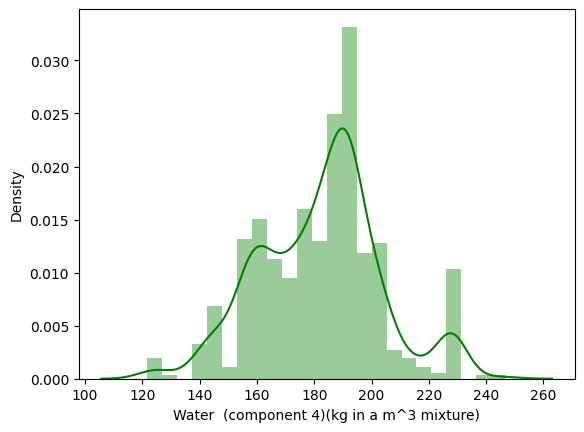

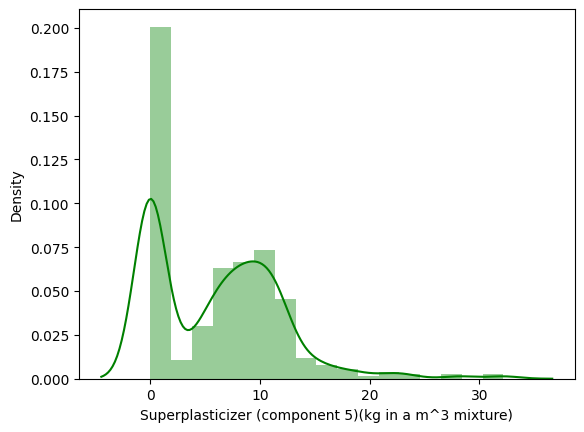

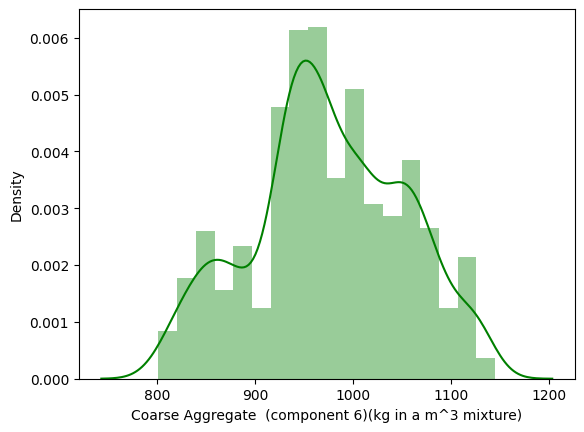

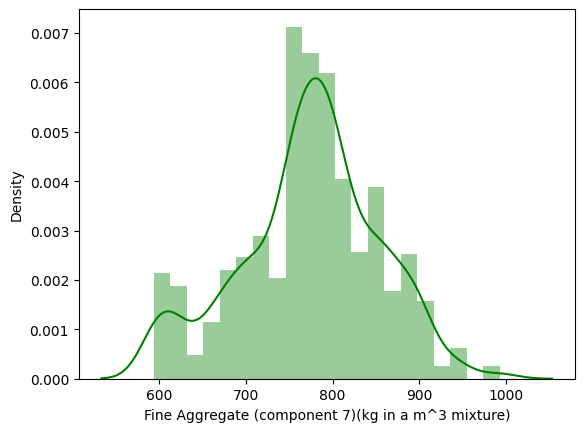

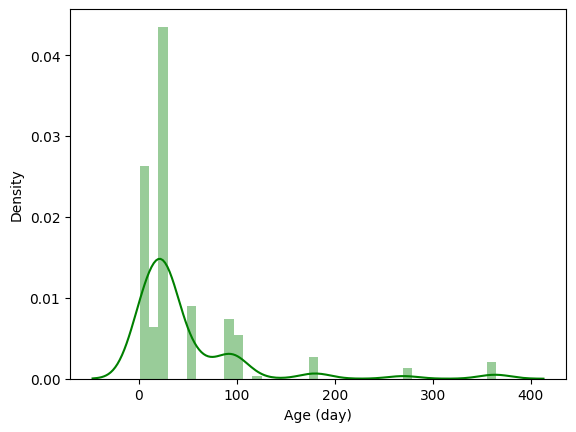

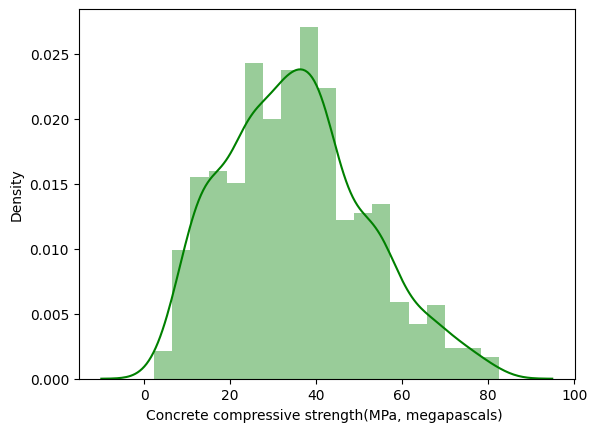

In [37]:
plt.figure(figsize=(10,10))
# Graphical Visualization of features
for col in (df.columns):
    # print(col)
    sns.distplot(x=df[col],color='green')
    plt.xlabel(col)
    plt.show()
    print("\n")

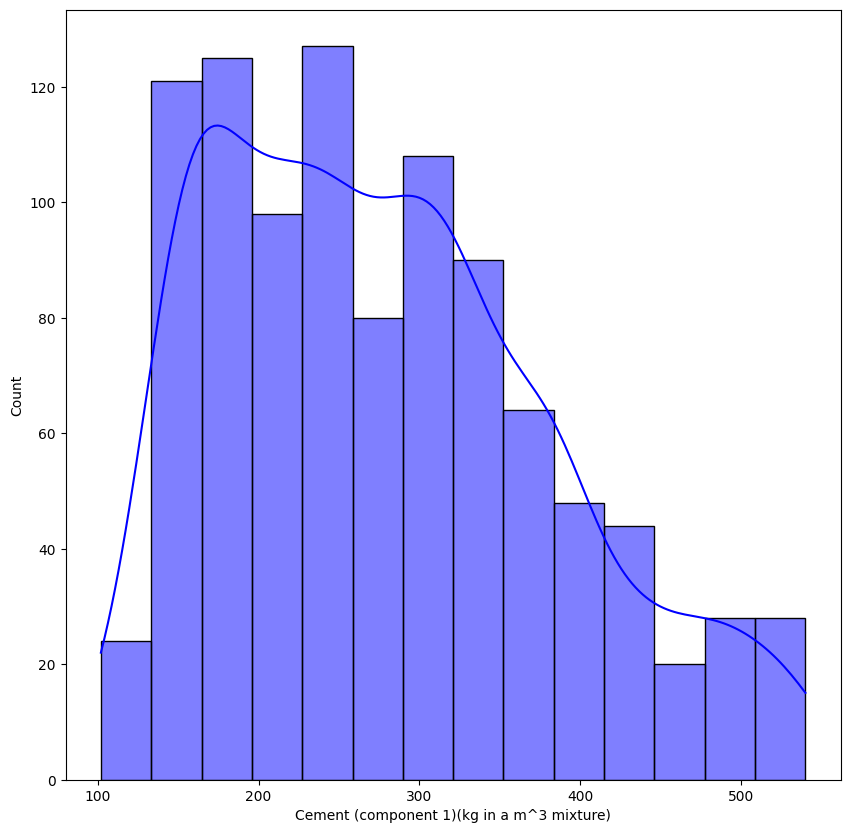

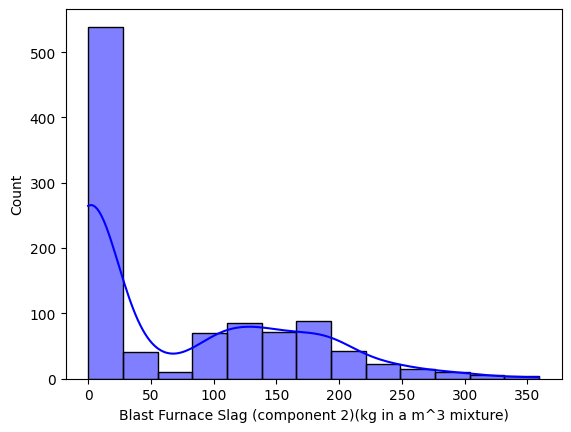

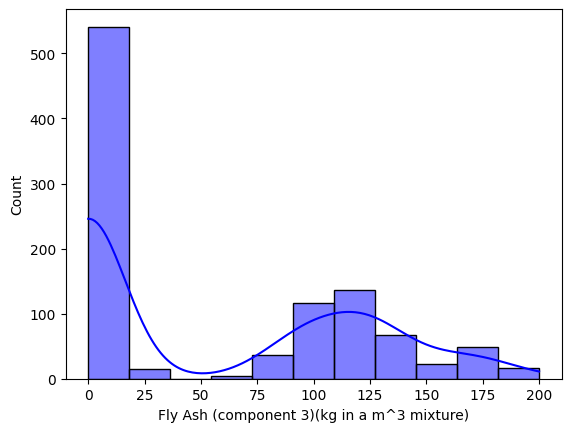

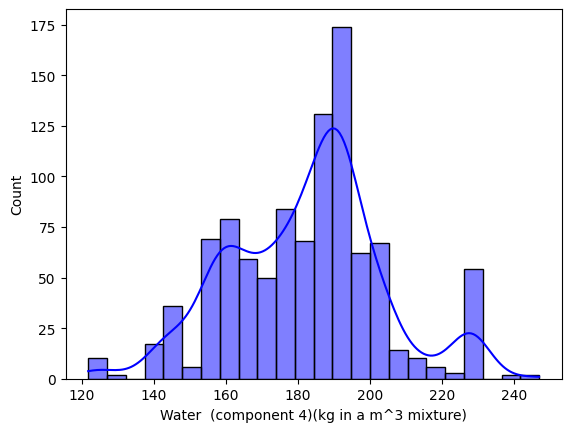

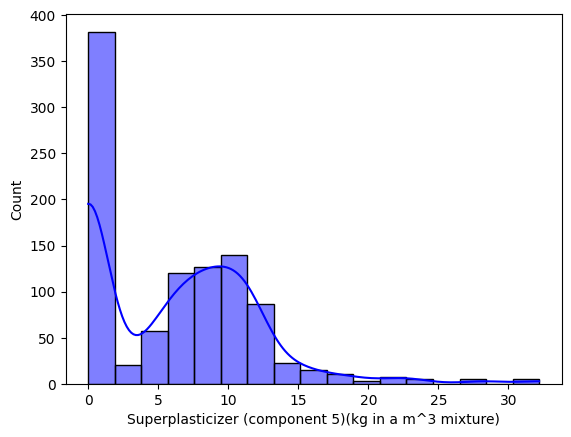

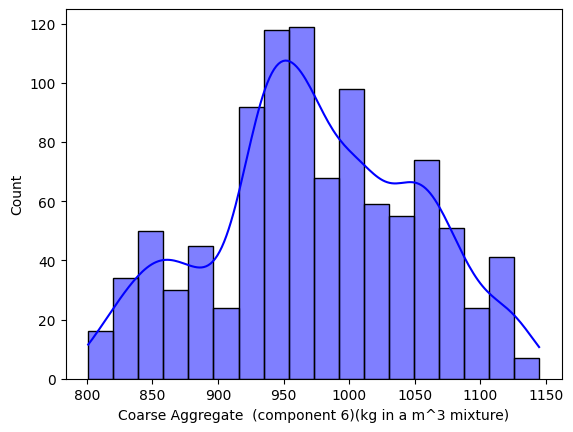

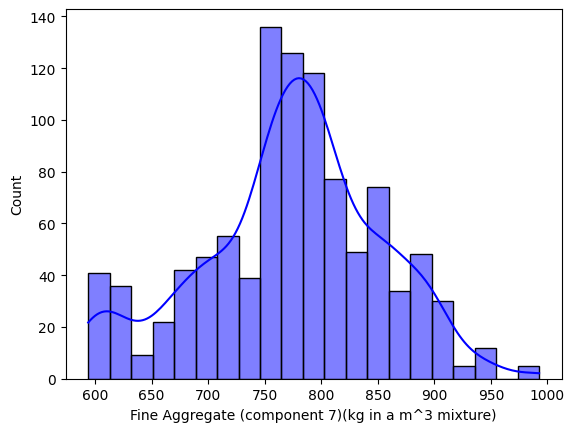

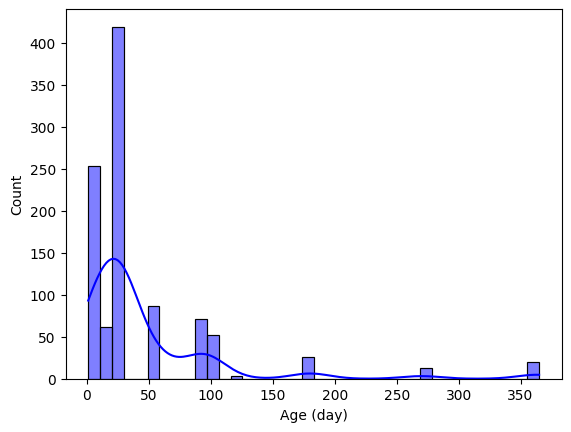

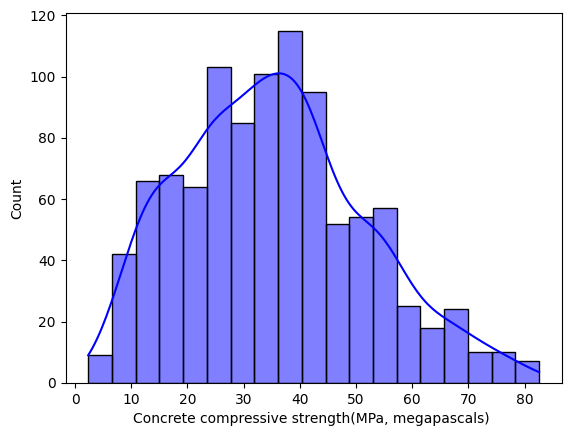

In [40]:
# Histogram of features
plt.figure(figsize=(10,10))
# Graphical Visualization of features
for col in (df.columns):
    # print(col)
    sns.histplot(x=df[col],color='blue',kde=True)
    plt.xlabel(col)
    plt.show()
    print("\n")

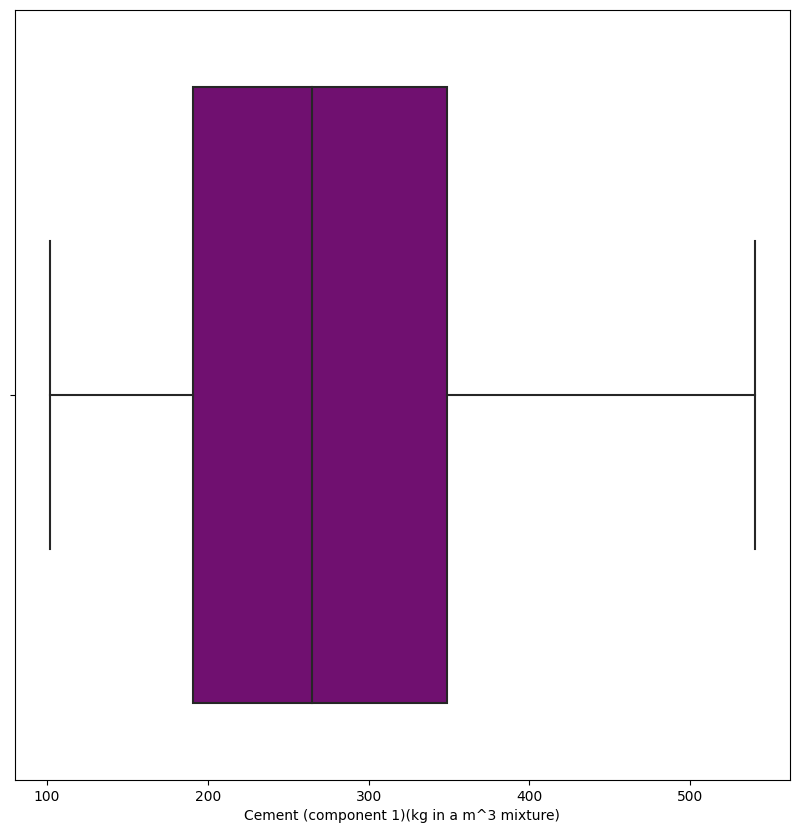

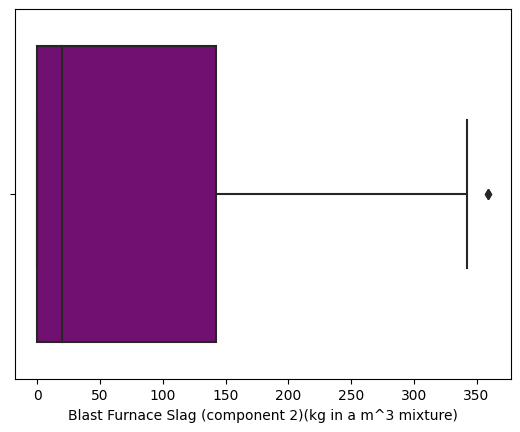

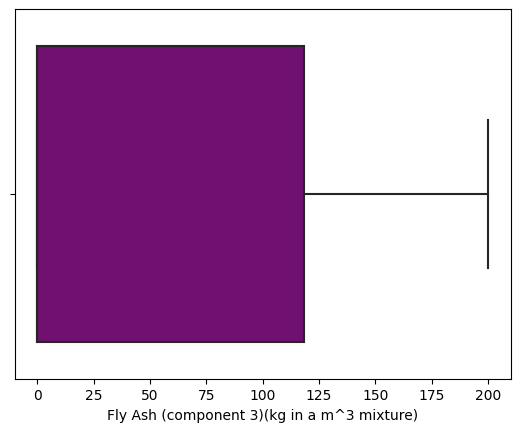

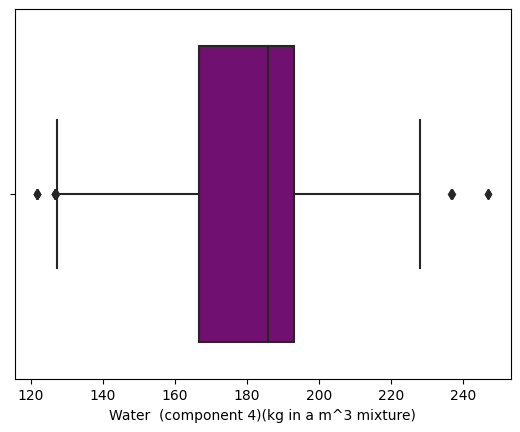

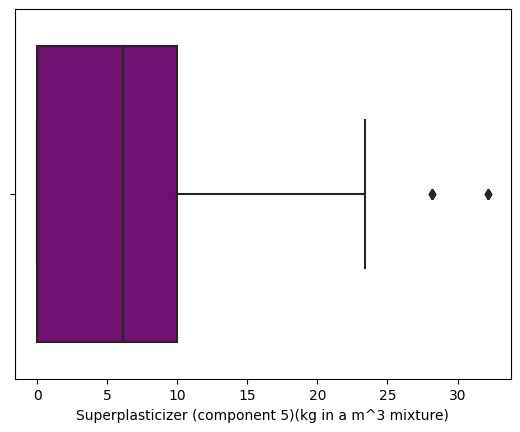

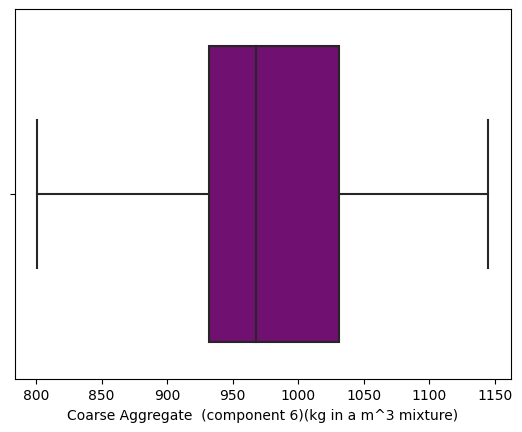

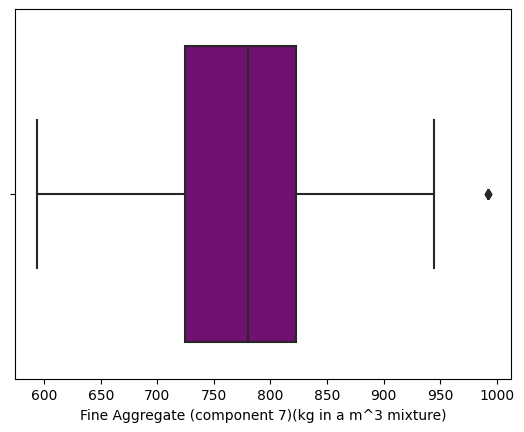

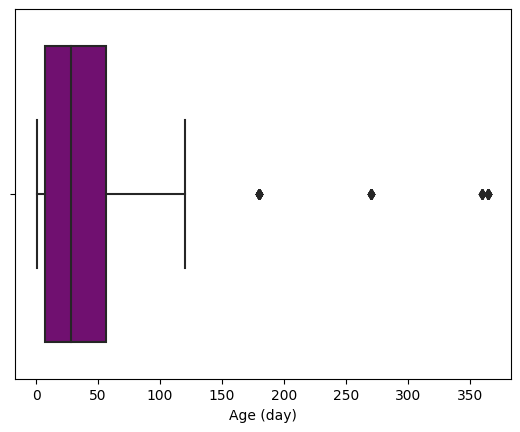

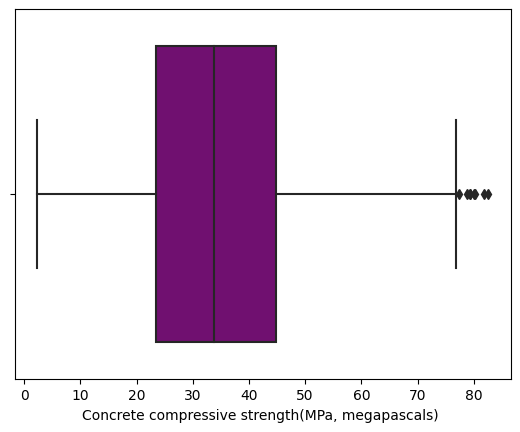

In [42]:
## Boxplot for outliers in dataset
plt.figure(figsize=(10,10))
# Graphical Visualization of features
for col in (df.columns):
    # print(col)
    sns.boxplot(x=df[col],color='purple')
    plt.xlabel(col)
    plt.show()
    print("\n") 

<Axes: >

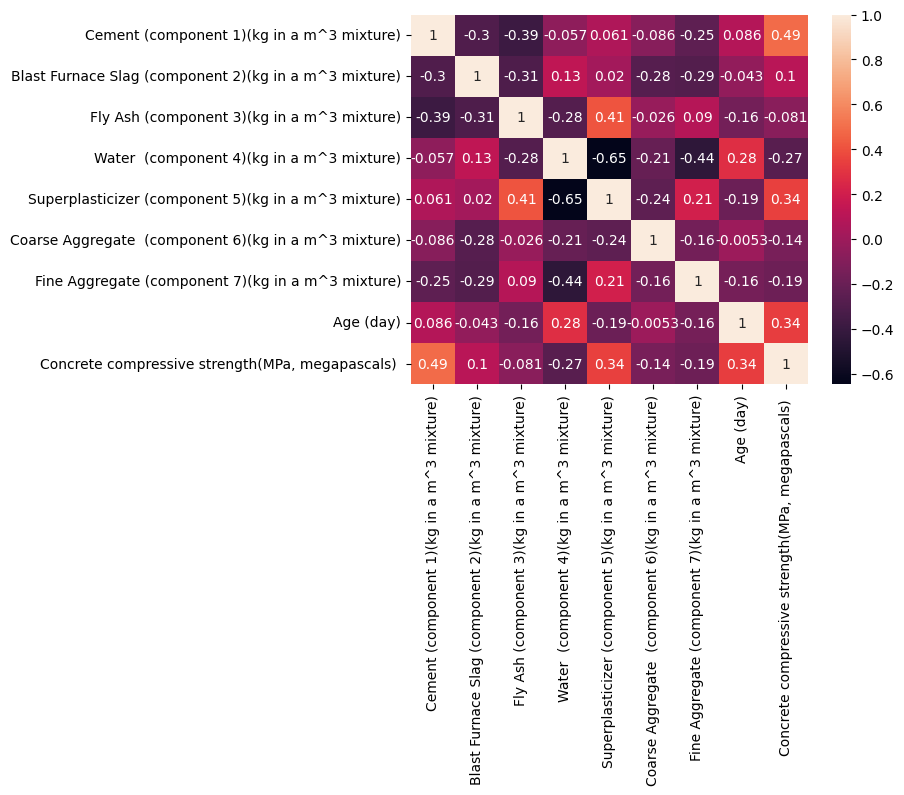

In [43]:
# Heatmap for correlaion
sns.heatmap(df[df.columns].corr(),annot=True)

In [45]:
## From above heatmap we can conclude that ['Fly Ash','Water','Coarse Aggregate','Fine Aggregate'] are not imp.  
# We will drop these cols later 

In [46]:
df.duplicated().sum()

0

In [ ]:
df.to_csv('/config/workspace/Cement_Strength_Prediction/notebooks/data/cement_data_preprocessed.csv',index=None)